In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('E:/BDCI Match/train.csv')
#df_T = pd.read_csv('E:/BDCI Match/test.csv')
def change_to_categorical(x):
    if x<=50:
        return 50
    elif x>50 and x<=100:
        return 100
    elif x>100 and x<=150:
        return 150
    elif x>150 and x<=200:
            return 200
    else: 
        return 250
# df.convert_objects(convert_numeric=True)
# df["2_total_fee"] = pd.to_numeric(df['2_total_fee'], errors='coerce')
cols = df.columns[df.dtypes.eq('object')]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
df['online_time'] = df.apply(lambda row: change_to_categorical(row['online_time']), axis=1)
# df['2_total_fee'] = df['2_total_fee'].astype('float64')
# df['3_total_fee'] = df['3_total_fee'].astype('float64')

#df = df.drop(['Chance of Admit '],axis = 1)
 
#df= df.drop('Serial No.',axis = 1)
df.head(10)
# print(df.isnull().sum())
# print(df.dtypes)
#df.describe(include = 'all')
#df_T.head(5)

,service_type,is_mix_service,online_time,1_total_fee,2_total_fee,3_total_fee,4_total_fee,month_traffic,many_over_bill,contract_type,...,local_caller_time,service1_caller_time,service2_caller_time,gender,age,complaint_level,former_complaint_num,former_complaint_fee,current_service,user_id
0,4,0,100,295.96,296.20,296.00,296.80,3813.614698,0,1,...,108.100000,0.000000,564.366667,1.0,31.0,0,0,0.0,99999825,NaN
1,1,0,50,265.20,261.20,208.50,174.50,0.000000,1,0,...,240.100000,355.166667,0.000000,1.0,30.0,0,0,0.0,90063345,NaN
2,1,0,50,44.50,70.20,69.00,61.40,2598.397406,0,0,...,27.666667,0.000000,98.416667,2.0,25.0,0,0,0.0,90109916,NaN
3,4,0,150,87.95,81.40,76.00,88.30,988.440563,0,0,...,89.900000,74.483333,121.833333,1.0,44.0,0,0,0.0,89950166,NaN
4,4,0,100,317.04,314.08,435.51,413.05,5885.800642,0,1,...,0.000000,35.100000,496.733333,1.0,31.0,2,1,0.0,99999825,NaN
5,4,0,50,36.00,36.00,36.00,37.20,218.003452,0,3,...,14.633333,0.000000,14.633333,1.0,42.0,0,0,0.0,89950168,NaN
6,1,0,50,33.60,32.70,38.70,45.70,0.000000,0,0,...,6.116667,136.033333,0.000000,1.0,27.0,0,0,0.0,90063345,NaN
7,3,0,100,200.13,66.50,66.50,66.50,0.000000,0,0,...,0.866667,0.000000,0.014444,1.0,24.0,0,0,0.0,99104722,NaN
8,4,0,150,116.00,116.00,116.00,116.00,635.946276,0,9,...,250.883333,0.000000,310.733333,1.0,40.0,0,0,0.0,89950167,NaN
9,4,0,50,16.00,19.45,19.60,17.80,0.002190,0,0,...,33.950000,0.000000,33.950000,1.0,50.0,0,0,0.0,89016252,NaN


In [90]:
print(df.isnull().any())

service_type              False
is_mix_service            False
online_time               False
1_total_fee               False
2_total_fee                True
3_total_fee                True
4_total_fee               False
month_traffic             False
many_over_bill            False
contract_type             False
contract_time             False
is_promise_low_consume    False
net_service               False
pay_times                 False
pay_num                   False
last_month_traffic        False
local_trafffic_month      False
local_caller_time         False
service1_caller_time      False
service2_caller_time      False
gender                     True
age                        True
complaint_level           False
former_complaint_num      False
former_complaint_fee      False
current_service           False
user_id                    True
dtype: bool


In [93]:
fee_null = pd.isnull(df['2_total_fee'])
data_null = df[fee_null == True]
print(data_null)

        service_type  is_mix_service  online_time  1_total_fee  2_total_fee  \
316212             4               0           50       120.75          NaN   
349037             4               0           50         0.00          NaN   
456036             4               0           50         0.40          NaN   
459053             4               0           50         0.00          NaN   

        3_total_fee  4_total_fee  month_traffic  many_over_bill  \
316212          NaN          0.0    1845.138838               0   
349037          0.0          0.0       0.000000               0   
456036          0.0          0.0       0.000000               0   
459053          0.0          0.0       0.000000               0   

        contract_type   ...     local_caller_time  service1_caller_time  \
316212              0   ...              3.283333              3.283333   
349037              0   ...              0.000000              0.000000   
456036              0   ...              1.

In [94]:
df = df.fillna(df.mean())

In [123]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.externals import joblib
# 测试集，画图对预测值和实际值进行比较
def test_validate(x_test, y_test, y_predict, classifier):
    x = range(len(y_test))
    plt.plot(x, y_test, "ro", markersize=5, zorder=3, label=u"true_v")
    plt.plot(x, y_predict, "go", markersize=8, zorder=2, label=u"predict_v,$R^2$=%.3f" % classifier.score(x_test, y_test))
    plt.legend(loc="upper left")
    plt.xlabel("number")
    plt.ylabel("true?")
    plt.show()
    
def logistic_regression(x, y):

    # 对数据的训练集进行标准化
    ss = StandardScaler()
    x_regular = ss.fit_transform(x)
    # 划分训练集与测试集
    x_train, x_test, y_train, y_test = train_test_split(x_regular, y, test_size=0.01)

    lr = LogisticRegression()
    lr.fit(x_train, y_train)

    # 模型效果获取
    r = lr.score(x_train, y_train)
    print("R值(准确率):", r)
    # 预测
    y_predict = lr.predict(x_test)  # 预测
    print(y_predict)
    print(y_test)

    # 绘制测试集结果验证
    #test_validate(x_test=x_test, y_test=y_test, y_predict=y_predict, classifier=lr)
    
    return lr


X = df[['service_type','online_time','1_total_fee','2_total_fee','3_total_fee','4_total_fee','many_over_bill','local_caller_time','service2_caller_time']]
Y = df[['current_service']]

model = logistic_regression(X,Y)
joblib.dump(model,'E:/BDCI Match/model/model_1_LR.model')

# X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2,random_state = 10)
# y_test.head(5)
# # Fit and Predict # 训练模型并检测准确率
# Logit = LogisticRegression()
# Logit.fit(X_train, y_train)
# answer = Logit.predict_proba(X_test)[:,1]
# print(answer) 
# precision, recall, thresholds = precision_recall_curve(y_test, answer)
# # Predict = Logit.predict(X_test)
# #print('Predict',Predict)
# Score = accuracy_score(y_test, Predict)
# plot_pr(Score, precision, recall, label=None)
# Score

# # X_test = df_T[['service_type','online_time','1_total_fee','2_total_fee','3_total_fee','4_total_fee','many_over_bill','local_caller_time','service2_caller_time']]
# # Y_test = df_T[['current_service']]
# # Y_test.head(5)


KeyboardInterrupt: 

In [128]:
model=joblib.load('E:/BDCI Match//model/model_1_LR.model')
df_T = pd.read_csv('E:/BDCI Match/test.csv')
X_name =  df_T['user_id']
cols = df_T.columns[df_T.dtypes.eq('object')]
df_T[cols] = df_T[cols].apply(pd.to_numeric, errors='coerce')
df_T = df_T.fillna(df_T.mean())
X_predict = df_T[['service_type','online_time','1_total_fee','2_total_fee','3_total_fee','4_total_fee','many_over_bill','local_caller_time','service2_caller_time']]
# X_name = df_T['user_id']
#print(X_name)
X_label = model.predict(X_predict)

DATA={
    'user_id': X_name,
    'predict': X_label
}
dataframe = pd.DataFrame(DATA)

dataframe.to_csv("E:/BDCI Match/result.csv",sep=',',index = False,columns = ["user_id","predict"])

In [103]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.linear_model import RandomizedLogisticRegression as RLR 
X = df.iloc[:,:24].as_matrix()
Y = df.iloc[:,25].as_matrix()
rlr = RLR() #建立随机逻辑回归模型，筛选变量
rlr.fit(X, Y) #训练模型
rlr.get_support() #获取特征筛选结果，也可以通过.scores_方法获取各个特征的分数
print(rlr.scores_)
print('通过随机逻辑回归模型筛选特征结束')
#打印的时候把2个东西连起来，用，逗号   java里面是+ 加号
#data.columns[rlr.get_support()]返回的是筛选后的列名,是一个迭代器
#S.join(iterable)  将iterable里面的元素用S连起来，S就是分隔符
print(u'有效特征为：%s' % ','.join(df.columns[rlr.get_support()]))
X = df[df.columns[rlr.get_support()]].as_matrix() #筛选好特征

lr = LR() #建立逻辑货柜模型
lr.fit(X, Y) #用筛选后的特征数据来训练模型
print('逻辑回归模型训练结束')
print('模型的平均正确率为:'+lr.score(X, Y)) #给出模型的平均正确率，本例为81.4%


# X = df[['service_type','online_time','1_total_fee','2_total_fee','3_total_fee','4_total_fee','many_over_bill','local_caller_time','service2_caller_time']]
# Y = df[['current_service']]
# X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2,random_state = 10)
# y_test.head(5)
# # Fit and Predict # 训练模型并检测准确率
# Logit = LogisticRegression()

KeyboardInterrupt: 

In [83]:
corr = df[['current_service','service_type','is_mix_service','online_time','1_total_fee','2_total_fee','3_total_fee','4_total_fee','month_traffic','many_over_bill','contract_type','local_caller_time','service1_caller_time','service2_caller_time','gender','age','complaint_level','former_complaint_num','former_complaint_fee']].corr()
corr

,current_service,service_type,is_mix_service,online_time,1_total_fee,2_total_fee,3_total_fee,4_total_fee,month_traffic,many_over_bill,contract_type,local_caller_time,service1_caller_time,service2_caller_time,gender,age,complaint_level,former_complaint_num,former_complaint_fee
current_service,1.000000,0.360970,0.103474,0.185007,0.465872,0.444630,0.451324,0.450349,0.168282,-0.299161,0.093002,0.263700,-0.008007,0.396377,-0.059103,-0.042895,0.082284,0.075715,-0.000948
service_type,0.360970,1.000000,0.165782,0.497959,0.391076,0.370616,0.407652,0.389972,0.240506,-0.692560,0.437100,0.256314,-0.011264,0.375147,0.018065,0.315259,0.146479,0.135964,-0.000589
is_mix_service,0.103474,0.165782,1.000000,0.091260,0.129755,0.121654,0.122624,0.116981,0.058558,-0.117031,0.092972,0.124490,-0.003507,0.161294,0.002976,0.051813,0.140934,0.127122,-0.000344
online_time,0.185007,0.497959,0.091260,1.000000,0.240508,0.228022,0.231400,0.237111,0.104635,-0.371027,0.241471,0.299989,0.048648,0.326193,-0.006747,0.450789,0.121416,0.109654,0.002738
1_total_fee,0.465872,0.391076,0.129755,0.240508,1.000000,0.831186,0.768827,0.792496,0.395091,-0.100566,0.171839,0.407673,0.284849,0.502075,-0.067782,0.027967,0.076003,0.068252,-0.000807
2_total_fee,0.444630,0.370616,0.121654,0.228022,0.831186,1.000000,0.793749,0.804410,0.359732,-0.076154,0.170847,0.379191,0.240774,0.485528,-0.068414,0.016643,0.080121,0.072999,-0.000525
3_total_fee,0.451324,0.407652,0.122624,0.231400,0.768827,0.793749,1.000000,0.799494,0.349100,-0.120914,0.180099,0.333328,0.151199,0.456748,-0.055842,0.021497,0.084909,0.078003,-0.000937
4_total_fee,0.450349,0.389972,0.116981,0.237111,0.792496,0.804410,0.799494,1.000000,0.351417,-0.129397,0.180652,0.370135,0.214882,0.481236,-0.071758,0.025124,0.088543,0.080554,-0.000578
month_traffic,0.168282,0.240506,0.058558,0.104635,0.395091,0.359732,0.349100,0.351417,1.000000,-0.146052,0.197080,0.159571,0.029151,0.238795,-0.012552,-0.012171,0.080753,0.079872,-0.000465
many_over_bill,-0.299161,-0.692560,-0.117031,-0.371027,-0.100566,-0.076154,-0.120914,-0.129397,-0.146052,1.000000,-0.309764,-0.165670,0.071759,-0.259321,-0.006701,-0.253463,-0.122379,-0.110976,0.000536


In [75]:
print(df.dtypes)

service_type                int64
is_mix_service              int64
online_time                 int64
1_total_fee               float64
2_total_fee               float64
3_total_fee               float64
4_total_fee               float64
month_traffic             float64
many_over_bill              int64
contract_type               int64
contract_time               int64
is_promise_low_consume      int64
net_service                 int64
pay_times                   int64
pay_num                   float64
last_month_traffic        float64
local_trafffic_month      float64
local_caller_time         float64
service1_caller_time      float64
service2_caller_time      float64
gender                    float64
age                       float64
complaint_level             int64
former_complaint_num        int64
former_complaint_fee      float64
current_service             int64
user_id                   float64
dtype: object


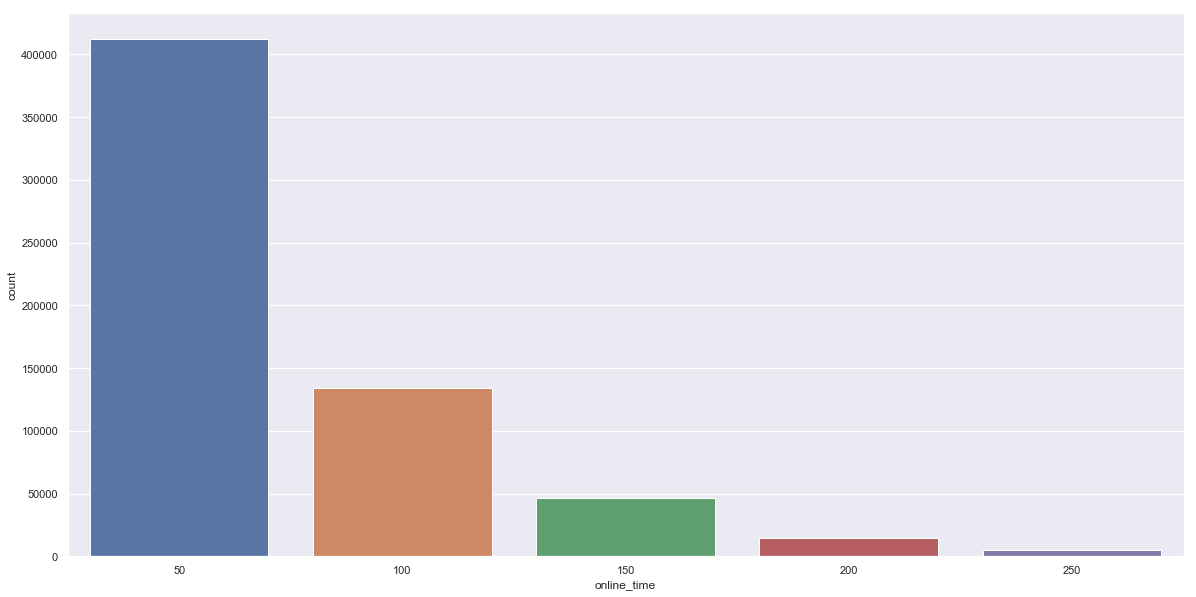

In [25]:
sns.countplot(x = 'online_time', order = [50,100,150,200,250], data = df)

In [19]:
df.describe(include = 'all')

,service_type,is_mix_service,online_time,1_total_fee,2_total_fee,3_total_fee,4_total_fee,month_traffic,many_over_bill,contract_type,...,local_caller_time,service1_caller_time,service2_caller_time,gender,age,complaint_level,former_complaint_num,former_complaint_fee,current_service,user_id
count,612652.000000,612652.000000,612652.000000,612652.000000,612652.0,612652.0,612652.000000,612652.000000,612652.000000,612652.000000,...,612652.000000,612652.000000,612652.000000,612652.0,612652.0,612652.000000,612652.000000,6.126520e+05,6.126520e+05,612652
unique,NaN,NaN,NaN,NaN,52475.0,41353.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10.0,162.0,NaN,NaN,NaN,NaN,612652
top,NaN,NaN,NaN,NaN,76.0,76.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,28.0,NaN,NaN,NaN,NaN,rU74pciEhZMk0nF1
freq,NaN,NaN,NaN,NaN,10722.0,14201.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,362371.0,29621.0,NaN,NaN,NaN,NaN,1
mean,2.748866,0.035844,42.831155,97.411841,NaN,NaN,102.870227,1159.336403,0.426857,1.491517,...,59.027933,42.500022,84.484956,NaN,NaN,0.119214,0.139472,5.000682e+06,9.225261e+07,NaN
std,1.438612,0.185902,45.367953,89.426252,NaN,NaN,101.235433,2754.759625,0.494622,2.967203,...,115.763426,110.368034,137.037867,NaN,NaN,0.380655,0.491302,2.798651e+09,4.218044e+06,NaN
min,1.000000,0.000000,1.000000,0.000000,NaN,NaN,-420.270000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000e+00,8.901625e+07,NaN
25%,1.000000,0.000000,10.000000,46.200000,NaN,NaN,44.900000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000e+00,8.995017e+07,NaN
50%,4.000000,0.000000,21.000000,72.630000,NaN,NaN,74.100000,139.220979,0.000000,0.000000,...,14.066665,0.000000,29.150000,NaN,NaN,0.000000,0.000000,0.000000e+00,9.006334e+07,NaN
75%,4.000000,0.000000,64.000000,116.000000,NaN,NaN,129.200000,1311.389001,1.000000,1.000000,...,67.516667,34.466667,123.966667,NaN,NaN,0.000000,0.000000,0.000000e+00,9.015595e+07,NaN


In [45]:
print('3_total_fee',df['3_total_fee'].unique())

3_total_fee [296.0 208.5 69.0 ... 443.85 171.71 231.09]


In [11]:
print('service_type',df['service_type'].unique())

service_type [4 1 3]


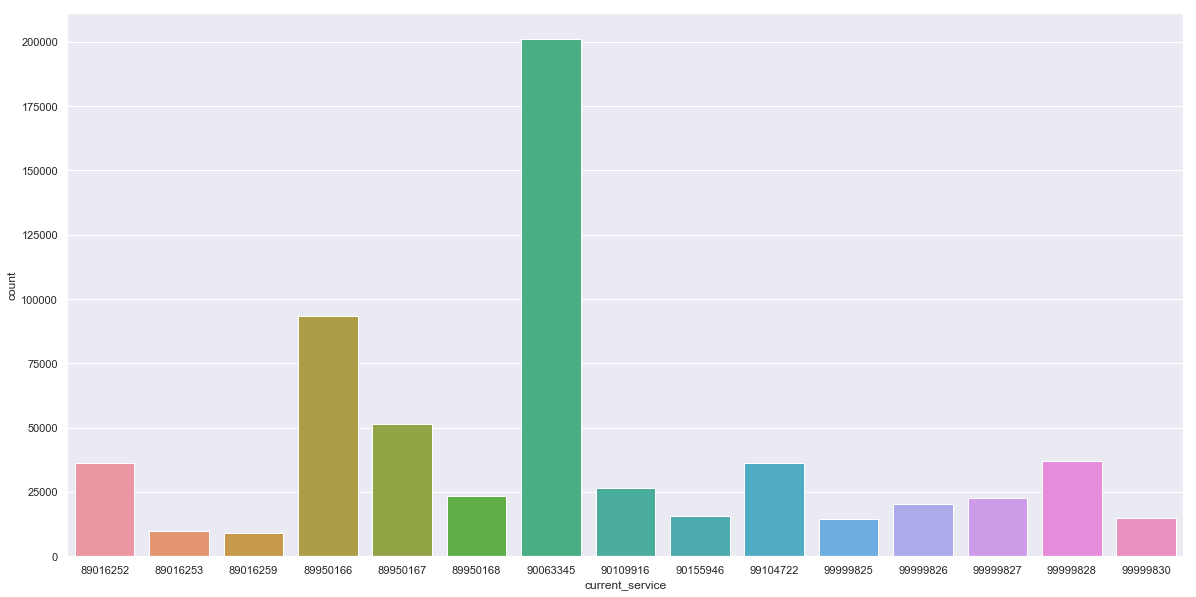

In [36]:
sns.countplot(x = 'current_service', data = df)

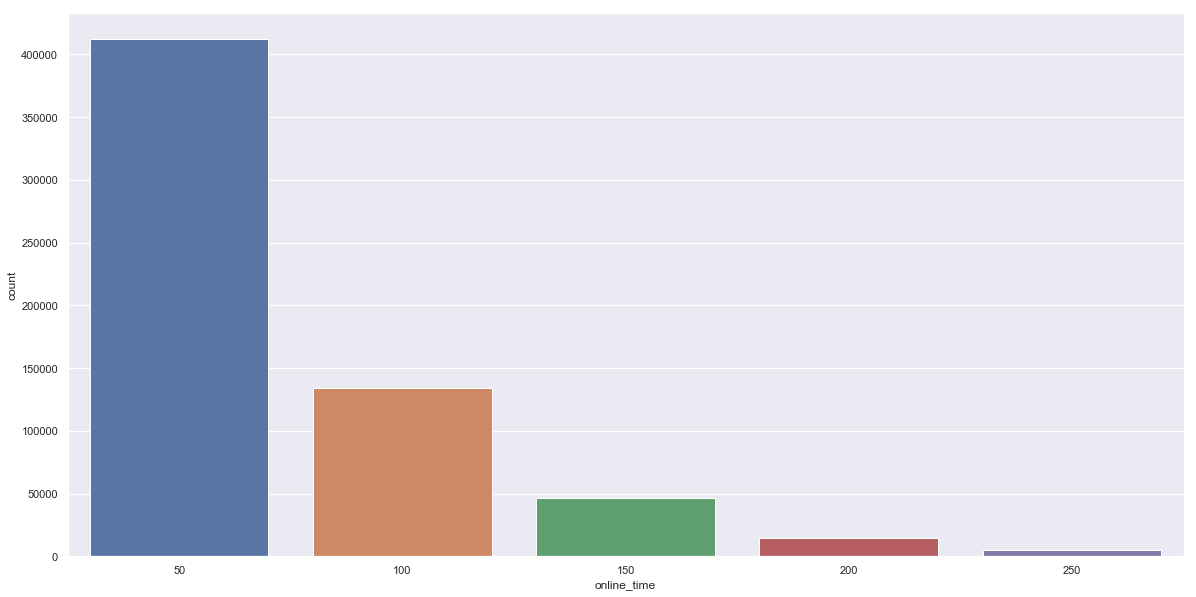

In [26]:
sns.countplot(x='online_time', data=df)

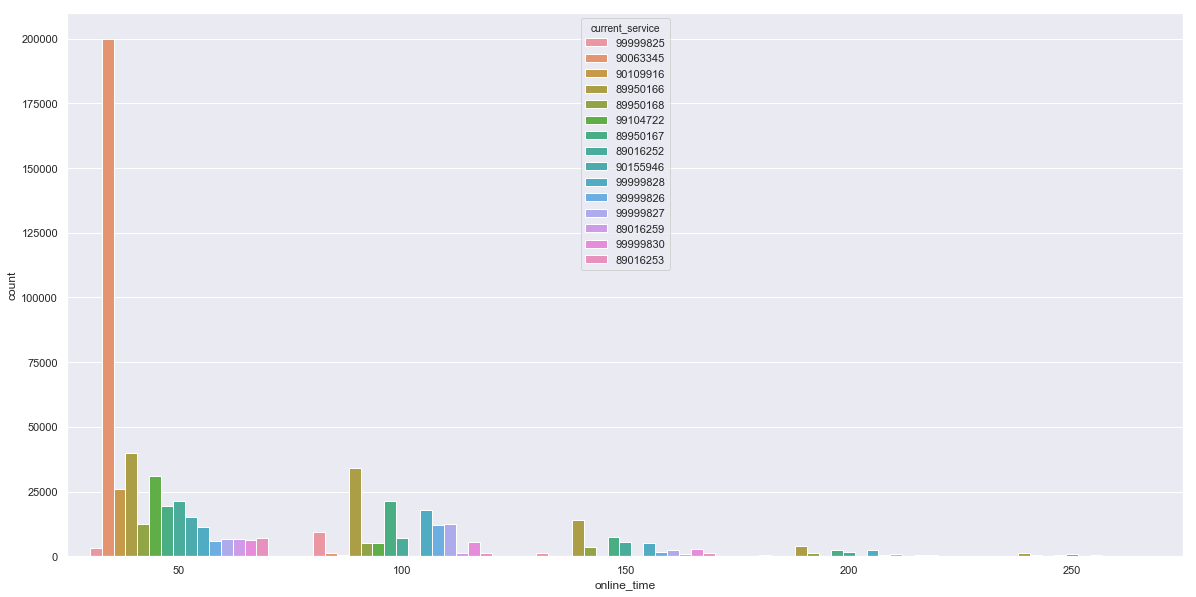

In [38]:
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(x ='online_time',hue = 'current_service',hue_order = [99999825,90063345, 90109916, 89950166, 89950168, 99104722, 89950167, 89016252,
 90155946, 99999828, 99999826, 99999827, 89016259, 99999830, 89016253,],data = df)

In [80]:
# Correlation Matrix 相关性矩阵
corr = df[['current_service','service_type', 'online_time', '1_total_fee', '2_total_fee', '3_total_fee']].corr()
corr

,current_service,service_type,online_time,1_total_fee,2_total_fee,3_total_fee
current_service,1.000000,0.360970,0.185007,0.465872,0.444630,0.451324
service_type,0.360970,1.000000,0.497959,0.391076,0.370616,0.407652
online_time,0.185007,0.497959,1.000000,0.240508,0.228022,0.231400
1_total_fee,0.465872,0.391076,0.240508,1.000000,0.831186,0.768827
2_total_fee,0.444630,0.370616,0.228022,0.831186,1.000000,0.793749
3_total_fee,0.451324,0.407652,0.231400,0.768827,0.793749,1.000000


In [3]:

sns.countplot(x = 'gender', data = df)

NameError: name 'sns' is not defined